In [104]:
import numpy as np
import flory
import sys
import matplotlib.pyplot as plt
import mpltern
import h5py


sys.path.append('/Users/calvinsmith/dufresne_lab/phase_space_search/')
import flory_classifier_v2
import flory_phase_space
from flory_classifier_v2 import FloryClassifier 
from flory_phase_space import PhaseSpace

import flory_phase_data
from flory_phase_data import PhaseData

## Generate Matrices

In [89]:
num_points = 100
num_comps = 3
num_chi_matrix = 2
chi_strength = 4

chi_set = np.empty(num_chi_matrix, dtype = object)
for j in range(num_chi_matrix):
    chi_matrix = chi_strength*np.random.rand(num_comps,num_comps)
    chi_matrix = np.transpose(chi_matrix) + chi_matrix
    for i in range(num_comps):
        chi_matrix[i,i] = 0
    chi_set[j] = chi_matrix


print(chi_set[1])

[[0.         6.98242129 3.63665613]
 [6.98242129 0.         3.64262329]
 [3.63665613 3.64262329 0.        ]]


In [90]:
points = np.random.rand(num_points,num_comps)
points = points/ points.sum(axis = 1, keepdims = True)


In [91]:
print(points)

[[4.00888923e-01 2.07391438e-01 3.91719639e-01]
 [1.80858965e-01 4.72633353e-01 3.46507682e-01]
 [2.66083000e-01 3.75385832e-01 3.58531168e-01]
 [3.33146671e-01 3.79575712e-01 2.87277617e-01]
 [7.78712625e-01 4.09458821e-02 1.80341493e-01]
 [2.24657321e-01 3.42168239e-01 4.33174440e-01]
 [6.41137793e-02 6.17264422e-01 3.18621798e-01]
 [4.52959031e-01 2.79854510e-01 2.67186460e-01]
 [9.35565995e-01 1.00609145e-02 5.43730904e-02]
 [5.33798646e-01 1.33552484e-01 3.32648870e-01]
 [1.76748505e-01 2.73039615e-01 5.50211880e-01]
 [3.45189739e-01 2.68944860e-01 3.85865401e-01]
 [4.59873865e-01 4.66256405e-01 7.38697299e-02]
 [3.58209280e-01 4.23002099e-01 2.18788621e-01]
 [1.28432051e-01 4.89857917e-01 3.81710032e-01]
 [3.92901279e-01 3.63279346e-01 2.43819375e-01]
 [2.38977484e-01 8.82825917e-02 6.72739924e-01]
 [6.10852687e-01 1.01614100e-01 2.87533213e-01]
 [5.93697764e-01 2.93573516e-01 1.12728719e-01]
 [1.84894759e-01 4.66393270e-01 3.48711971e-01]
 [1.20066737e-01 4.20413540e-01 4.595197

In [92]:
evolved_points= np.empty((num_chi_matrix, num_points), dtype= object)
print(points[1,:])

[0.18085897 0.47263335 0.34650768]


In [93]:
for i in range(num_chi_matrix):
    for j in range(num_points):
        evolved_points[i,j] = flory.find_coexisting_phases(num_comps, chi_matrix, points[i,:], progress = False)

In [94]:
data = PhaseData(chi_matrix, points, evolved_points)

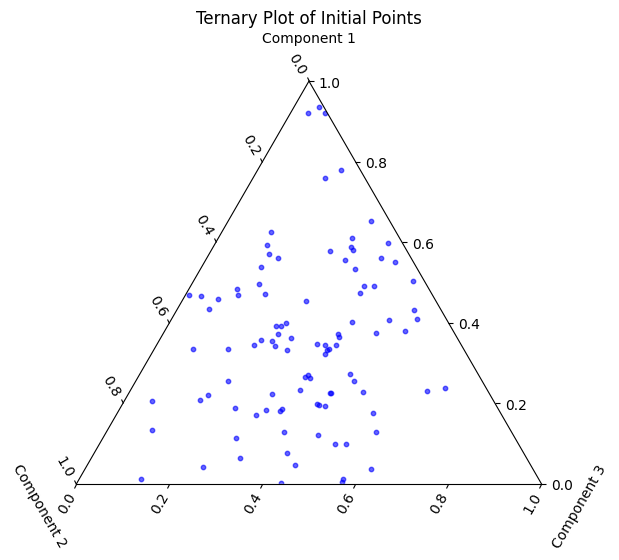

In [95]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'ternary'})

# Plot the points
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='blue', alpha=0.6, s=10)

# Set labels for the ternary axes
ax.set_tlabel("Component 1")
ax.set_llabel("Component 2")
ax.set_rlabel("Component 3")

# Title
ax.set_title("Ternary Plot of Initial Points")

# Show plot
plt.show()

In [96]:
folder_path = "/Users/calvinsmith/dufresne_lab/phase_space_search/Saved_Phase_Data/"

file_path = folder_path + "test_phase_data_v2.h5"

hf = h5py.File(file_path, 'w')


In [97]:
test = evolved_points[1,15]
test.volumes

array([0.17466996, 0.47655283, 0.3487772 ])

In [98]:

for i in range(num_chi_matrix):
    g1 = hf.create_group(f"chi_matrix_{i}")
    g2 = g1.create_group("evolved_phases")



In [99]:

volumes = np.zeros((num_chi_matrix, num_points, num_comps))

for i in range(num_chi_matrix):
    for j in range(num_points):
        phase = evolved_points[i,j]
        phase_vol = phase.volumes
        volumes[i,j,0:len(phase_vol)] = phase_vol

bool_phases_map = (volumes != 0).astype(float)

num_phases = np.sum(bool_phases_map, axis=-1) 

max_num_phases = np.max(num_phases, axis=1)  
max_indices = np.argmax(num_phases, axis=1) 

max_phases = int(max_num_phases[0])

In [100]:


phi_comps = np.zeros((num_chi_matrix, num_points, max_phases, num_comps))


for i in range(num_chi_matrix):
    for j in range(num_points):
        phase = evolved_points[i,j]
        phase_fractions = phase.fractions
        pf_shape = phase_fractions.shape
        phi_comps[i,j,0:pf_shape[0], 0:pf_shape[1]] = phase_fractions


In [101]:



for i in range(num_chi_matrix):
    g1 = hf[f"chi_matrix_{i}"]
    g1.create_dataset("initial_points", data = points)
    g1.create_dataset("chi_matrix", data = chi_set[i])
    g2 = g1["evolved_phases"]
    g2.create_dataset("volumes", data = volumes[i])
    g2.create_dataset("comp_fracs", data = phi_comps[i])
    g2.create_dataset("num_phases", data = num_phases[i])



In [102]:
import h5py
import numpy as np

# Define the file path
folder_path = "/Users/calvinsmith/dufresne_lab/phase_space_search/Saved_Phase_Data/"
file_path = folder_path + "test_phase_data_v2.h5"

# Open the HDF5 file
with h5py.File(file_path, 'r') as hf:
    for chi_key in hf.keys():
        print(f"\n📂 {chi_key}:")  # Print the chi_matrix group name
        
        g1 = hf[chi_key]
        
        # Print initial data
        print("  ├── initial_points:", g1["initial_points"][:].shape)
        print("  ├── chi_matrix:", g1["chi_matrix"][:].shape)
        
        # Access evolved phases
        if "evolved_phases" in g1:
            g2 = g1["evolved_phases"]
            print("  ├── evolved_phases:")
            print("      ├── volumes:", g2["volumes"][:].shape)
            print("      ├── comp_fracs:", g2["comp_fracs"][:].shape)
            print("      ├── num_phases:", g2["num_phases"][:].shape)
            
            # Optionally print a small sample of the data
            print("      ├── num_phases sample:", g2["num_phases"][:5])  # First 5 values



📂 chi_matrix_0:
  ├── initial_points: (100, 3)
  ├── chi_matrix: (3, 3)
  ├── evolved_phases:
      ├── volumes: (100, 3)
      ├── comp_fracs: (100, 3, 3)
      ├── num_phases: (100,)
      ├── num_phases sample: [3. 3. 3. 3. 3.]

📂 chi_matrix_1:
  ├── initial_points: (100, 3)
  ├── chi_matrix: (3, 3)
  ├── evolved_phases:
      ├── volumes: (100, 3)
      ├── comp_fracs: (100, 3, 3)
      ├── num_phases: (100,)
      ├── num_phases sample: [3. 3. 3. 3. 3.]


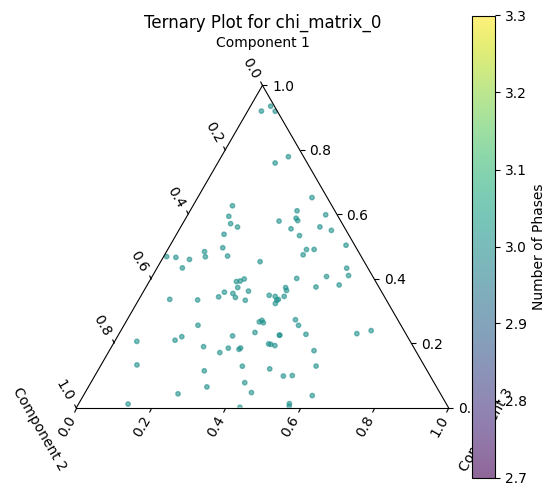

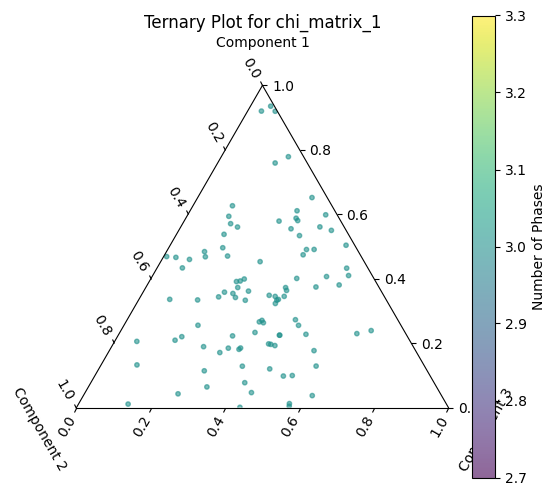

In [103]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import mpltern

# Define the file path
folder_path = "/Users/calvinsmith/dufresne_lab/phase_space_search/Saved_Phase_Data/"
file_path = folder_path + "test_phase_data_v2.h5"

# Open the HDF5 file
with h5py.File(file_path, 'r') as hf:
    for chi_key in hf.keys():
        g1 = hf[chi_key]

        # Extract initial points and number of phases
        points = g1["initial_points"][:]
        num_phases = np.ravel(g1["evolved_phases"]["num_phases"][:])  # Flatten to 1D

        # Normalize points for ternary plot (ensure they sum to 1)
        points /= np.sum(points, axis=1, keepdims=True)

        # Create a ternary plot using mpltern
        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': 'ternary'})

        # Plot initial points with color indicating the number of phases
        scatter = ax.scatter(points[:, 0], points[:, 1], points[:, 2], 
                             c=num_phases, cmap='viridis', alpha=0.6, s=10)

        # Add colorbar
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label("Number of Phases")

        # Set ternary axis labels
        ax.set_tlabel("Component 1")
        ax.set_llabel("Component 2")
        ax.set_rlabel("Component 3")

        # Title
        ax.set_title(f"Ternary Plot for {chi_key}")

        # Show plot
        plt.show()
